In [4]:
# 1. IMPORTS Done
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, r2_score, auc
import matplotlib.colors as mcolors

In [5]:
# 2. Data :: Loading, reading, exploring

heartML2 = pd.read_csv("heartML2.csv")
print(heartML2.shape)
heartML2.info()
heartML2.head(10)

(245, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            244 non-null    object 
 1   Race                             245 non-null    object 
 2   Sum of Deaths per 10000 by Race  245 non-null    float64
 3   Output                           245 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.8+ KB


,State,Race,Sum of Deaths per 10000 by Race,Output
0,AK,American Indian and Alaskan Native,7237.5,0
1,AK,Asian and Pacific Islander,1945.2,0
2,AK,Black,2642.7,0
3,AK,Hispanic,520.3,0
4,AK,White,5234.4,0
5,AL,American Indian and Alaskan Native,1585.4,0
6,AL,Asian and Pacific Islander,5868.9,0
7,AL,Black,34818.3,1
8,AL,Hispanic,7724.3,0
9,AL,White,30424.8,1


In [6]:
# Data is already pre-cleaned at this point formatted in csv file.
#Probable need to drop the State and Race/Ethnicity.

In [8]:
heartML2.drop_duplicates(inplace=True)
print(sum(heartML2.duplicated()))

0


0    145
1    100
Name: Output, dtype: int64


Text(0.5, 1.0, 'Distribution of target values')

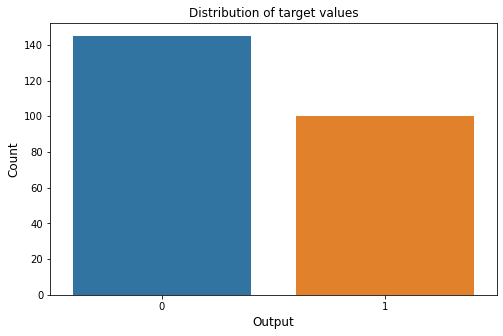

In [10]:
# barplot
print(heartML2['Output'].value_counts())
plt.figure(figsize = (8, 5))
sns.countplot(x = heartML2['Output'])
plt.xlabel("Output", size = 12)
plt.ylabel("Count", size = 12)
plt.title("Distribution of target values", size = 12)

<AxesSubplot:>

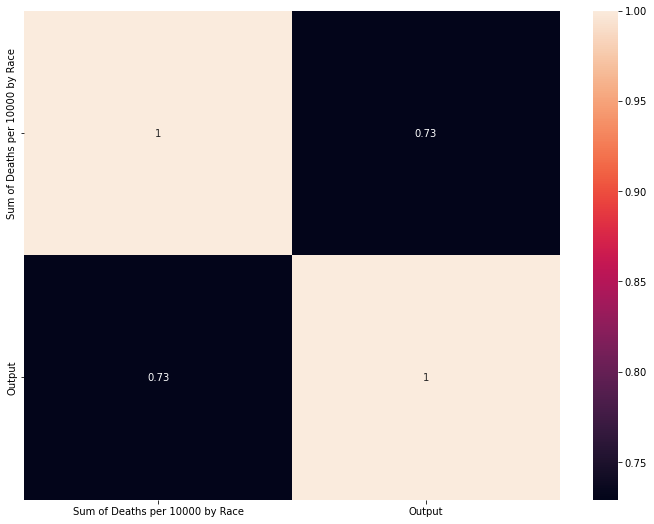

In [14]:
cor = heartML2.corr()
plt.figure(figsize =  (12,9))
sns.heatmap(cor, annot = True)

In [21]:
X = heartML2.iloc[:,heartML2.columns != 'Output']
y = heartML2.Output

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

In [23]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

ValueError: could not convert string to float: 'NH'